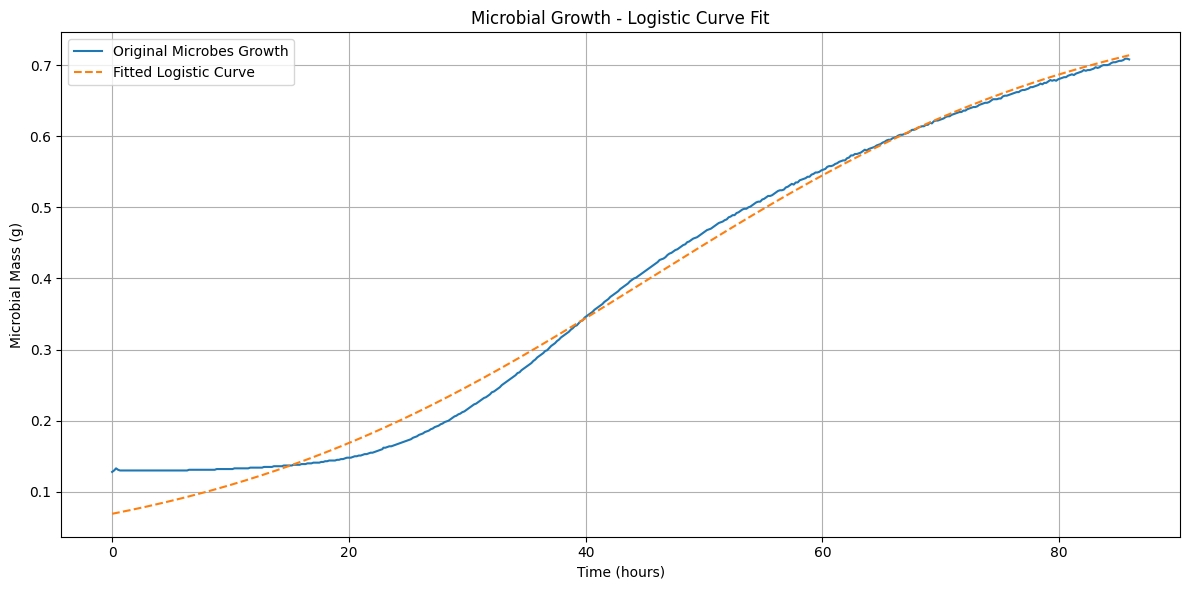

R² Score: 0.9895831650024219
Optimized Parameters: K = 0.8013, r = 0.0519, t0 = 45.4735
Covariance Matrix:
 [[ 4.79470412e-05 -4.16759327e-06  2.92034331e-03]
 [-4.16759327e-06  4.76673729e-07 -2.55082729e-04]
 [ 2.92034331e-03 -2.55082729e-04  1.92304667e-01]]


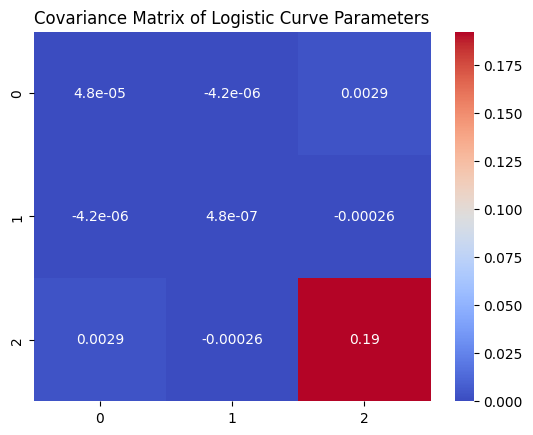

In [3]:
# PRACTICAL 03: Logistic Curve Fitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Step 1: Load the dataset
path = "/content/microbial_growth_curve.csv"  # Update with your actual path
df = pd.read_csv(path)

# Step 2: Prepare data
x = df['t [h]']
y = df['microbes(g)']
x_time = x - x.min()  # Normalize time to start at 0

# Step 3: Define logistic model
def logistic_curve(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Step 4: Initial guesses
K_init = y.max()
r_init = 1
t0_init = x.median()
p0 = [K_init, r_init, t0_init]

# Step 5: Fit model
params, cov = curve_fit(logistic_curve, x_time, y, p0=p0, maxfev=10000)

# Step 6: Predict
y_pred = logistic_curve(x_time, *params)

# Step 7: Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Original Microbes Growth")
plt.plot(x, y_pred, '--', label="Fitted Logistic Curve")
plt.title("Microbial Growth - Logistic Curve Fit")
plt.xlabel("Time (hours)")
plt.ylabel("Microbial Mass (g)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 8: Evaluation
r2 = r2_score(y, y_pred)
print("R² Score:", r2)
print("Optimized Parameters: K = {:.4f}, r = {:.4f}, t0 = {:.4f}".format(*params))
print("Covariance Matrix:\n", cov)

# Step 9: Covariance Matrix Heatmap
sns.heatmap(cov, annot=True, cmap="coolwarm")
plt.title("Covariance Matrix of Logistic Curve Parameters")
plt.show()
